# First Section : Clustering

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read Data
market_best = pd.read_csv("Q1_data.csv")

## Part 0
### Data Visualization of Top Cryptocurrencies Over One Year

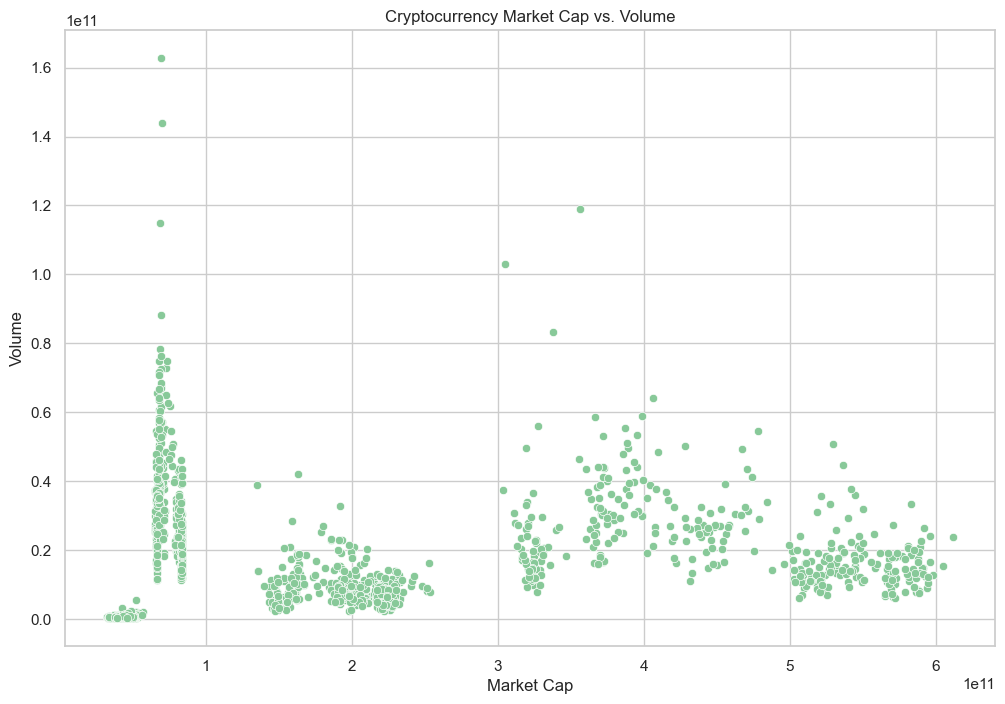

In [6]:
# Data Visualization of Top Cryptocurrencies Over One Year by Plotting its Scatter Plot

# Create a scatter plot using seaborn and pandas
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
sns.scatterplot(x=market_best['market_cap'], y=market_best['volume'], color = '#88c999')

# Customize and show the plot
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.title('Cryptocurrency Market Cap vs. Volume')
plt.show()

## Part 1
### K-means Clustering with 5 Clusters

We here use k-means clustering with k=5 on 'market_cap' and 'volume'columns and get the centers of each cluster. We also get the label of each point then we visualize our clustering

In [7]:
from sklearn.cluster import KMeans

In [8]:
# K-means Clustering of Cryptocurrencies with 5 Clusters Based on Market Cap and Volume
clustering_features = market_best[['market_cap', 'volume']]
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0).fit(clustering_features)
K_centroids = kmeans.cluster_centers_
K_labels = kmeans.labels_

c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


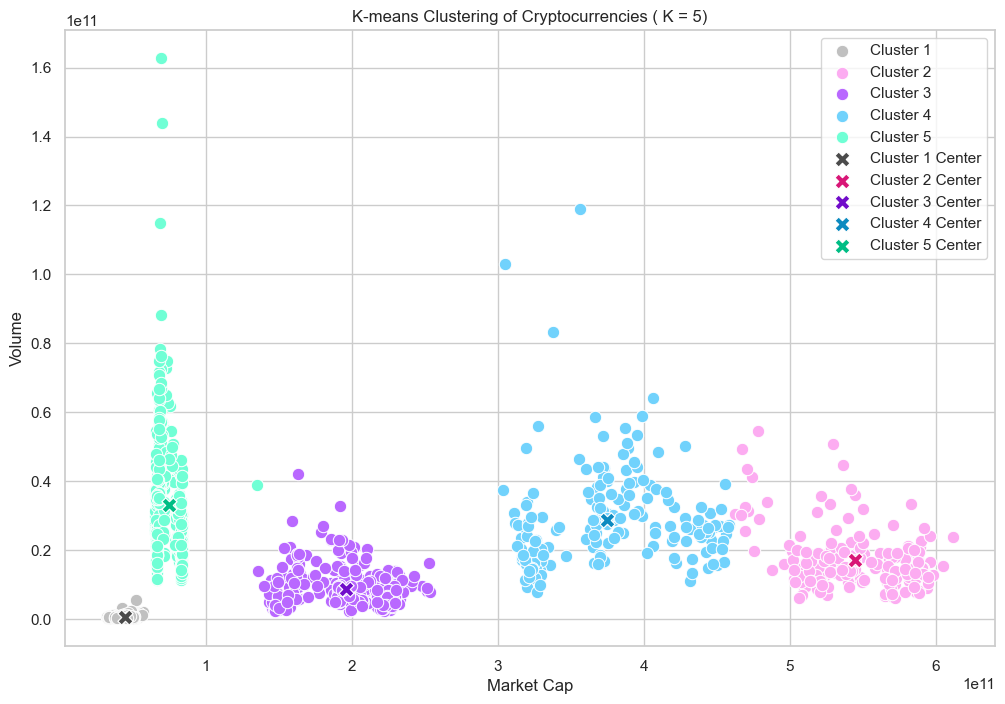

In [9]:
# Visualization

# Create a list of colors for the clusters and their centers
cluster_colors = ['#C0C0C0', '#FCACF1', '#B968FF', '#71D2FC', '#70FFD5']
centroids_colors = ['#4B4B4B', '#D81677', '#710CCA', '#0C8AC0', '#00BD84']

plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

# Plot the clusters and their centers 
for cluster_label, color in enumerate(cluster_colors):
    cluster_data = clustering_features[K_labels == cluster_label]
    sns.scatterplot(x=cluster_data['market_cap'], y=cluster_data['volume'],
                label=f'Cluster {cluster_label+1}' ,color=color, s=80)

for i, center in enumerate(K_centroids):
    sns.scatterplot(x=[center[0]], y=[center[1]], color=centroids_colors[i], marker='X', s=120, label=f'Cluster {i+1} Center')

# Customize and show the plot
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.title('K-means Clustering of Cryptocurrencies ( K = 5)')
plt.legend(loc='upper right')
plt.show()

## Part 2
### Optimizing the Value of K in K-means Clustering Using Within-Cluster Sum of Squares (WCSS)

In this part we use different methods in order to find the optimal k in range 1 to 10

#### Using gap-statistics

Here we initialize two functions first for computing the Within-Cluster Sum of Squares (WCSS) and second for computing k using gap statistics

In [10]:

from scipy.spatial.distance import cdist

In [11]:
def compute_WCSS(X, labels, centers):
    wcss = 0
    for i in range(len(centers)):
        cluster_points = X[labels == i]
        wcss += np.sum((cluster_points - centers[i]) ** 2)
    return wcss

def compute_gap_statistic(X, max_k):
    wcss = []
    gap = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss.append(compute_WCSS(X, kmeans.labels_, kmeans.cluster_centers_))

        # Generate reference data for computing the gap statistic
        B = 10
        reference_wcss = np.zeros(B)
        for b in range(B):
            reference_data = np.random.uniform(low=np.min(X, axis=0), high=np.max(X, axis=0), size=X.shape)
            kmeans_reference = KMeans(n_clusters=k, random_state=0)
            kmeans_reference.fit(reference_data)
            reference_wcss[b] = compute_WCSS(reference_data, kmeans_reference.labels_, kmeans_reference.cluster_centers_)

        # Compute the gap statistic
        gap.append(np.mean(np.log(reference_wcss)) - np.log(wcss[-1]))

    return gap, wcss


c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

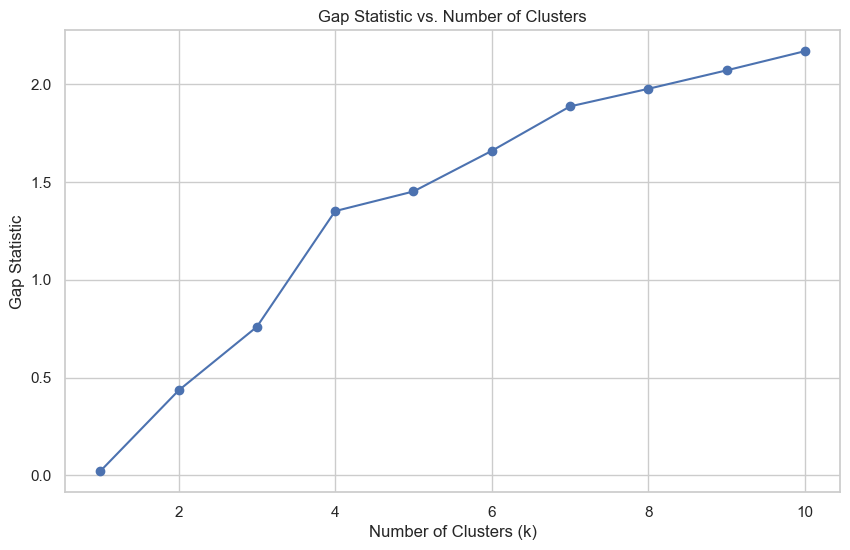

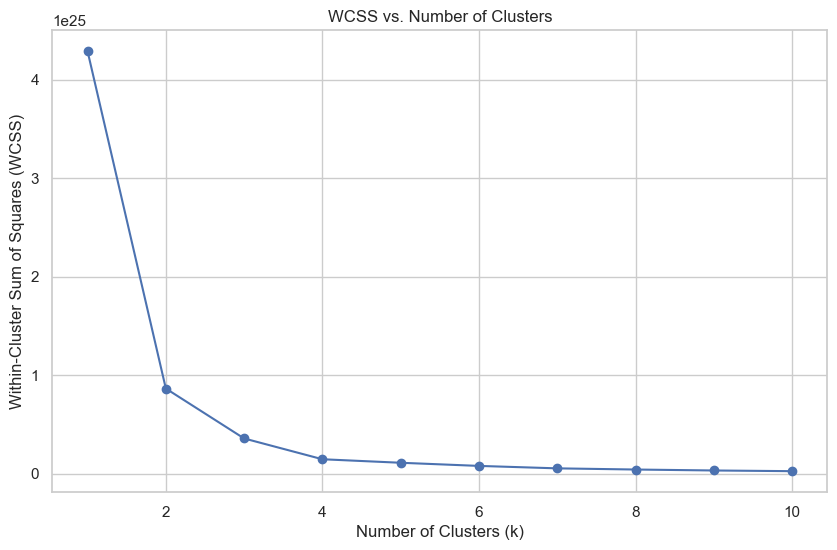

In [12]:
numeric_data = market_best.select_dtypes(include=np.number)
X = numeric_data.values

# Compute the Gap Statistic
max_k = 10
gap, wcss = compute_gap_statistic(X, max_k)

# Plot the Gap Statistic
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gap, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. Number of Clusters')
plt.grid(True)
plt.show()

# Plot the WCSS for different values of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('WCSS vs. Number of Clusters')
plt.grid(True)
plt.show()

c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

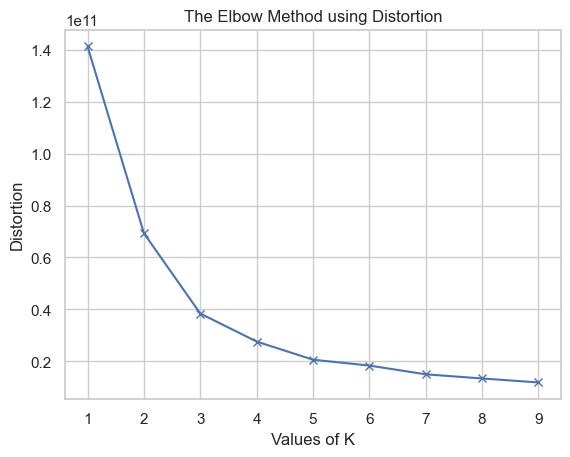

In [14]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(clustering_features)

	distortions.append(sum(np.min(cdist(clustering_features, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / clustering_features.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(clustering_features, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / clustering_features.shape[0]
	mapping2[k] = kmeanModel.inertia_
	
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

min_k = 2
max_k = 10

best_k = None
best_silhouette_score = -1

for k in range(min_k, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(clustering_features)  # Replace 'data' with your feature data
    silhouette_avg = silhouette_score(clustering_features, cluster_labels)
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_k = k

c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\darfa\miniconda3\envs\quera\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


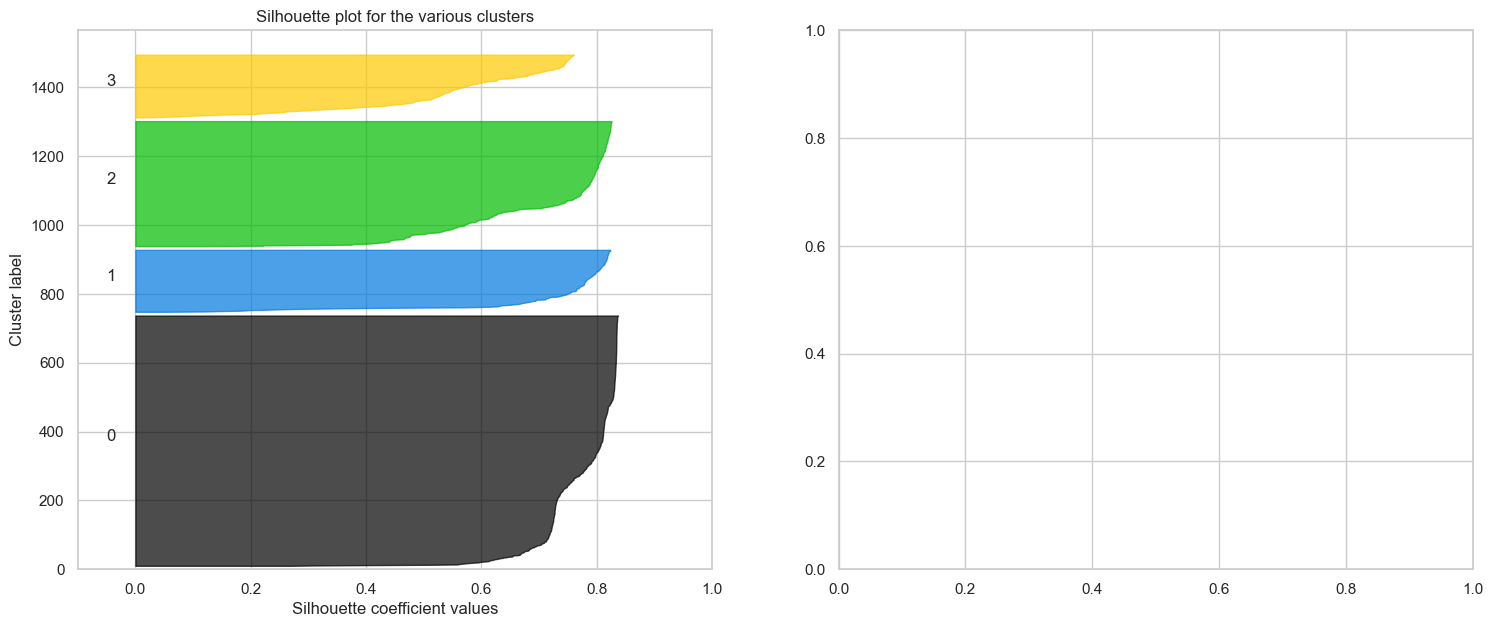

In [19]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The first subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(clustering_features) + (k + 1) * 10])

# Initialize the clusterer with k value and fit to data
kmeans = KMeans(n_clusters=best_k, random_state=0)
cluster_labels = kmeans.fit_predict(clustering_features)

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(clustering_features, cluster_labels)

y_lower = 10
for i in range(best_k):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / best_k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("Silhouette plot for the various clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

plt.show()

## Part 3
### DBScan Clustering with 5  Meaningful Clusters

In [155]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [156]:
dbclustering_features = market_best[['market_cap', 'volume']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dbclustering_features)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)


C:\Users\darfa\AppData\Local\Temp\ipykernel_17732\2506003172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbclustering_features['cluster'] = dbscan.fit_predict(scaled_features)


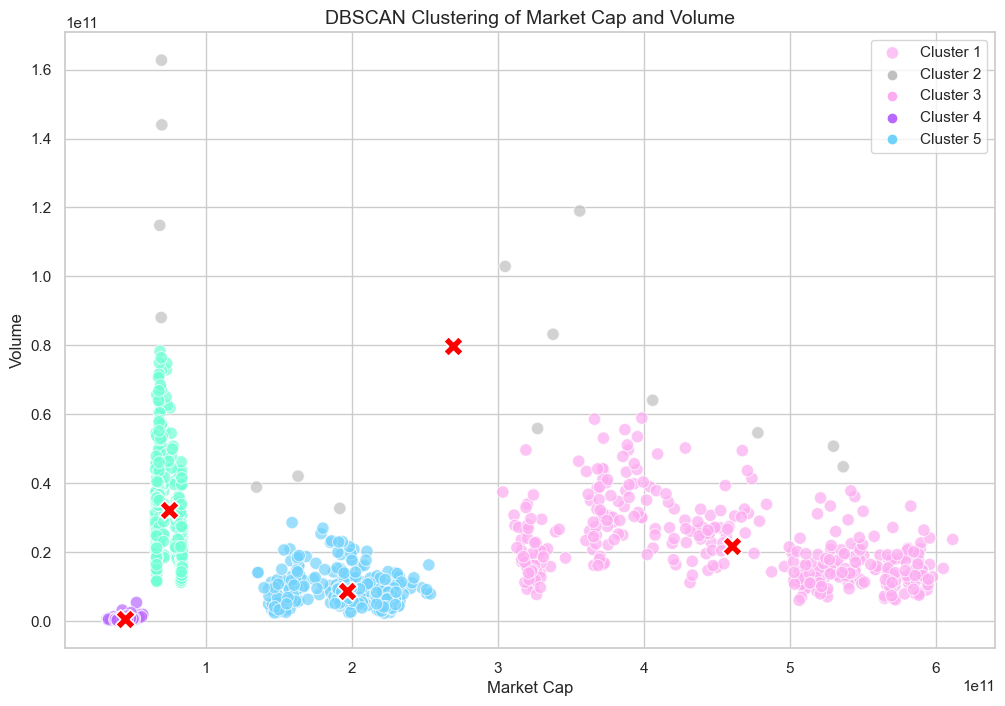

In [158]:
# Visualization

# Add the cluster labels to the DataFrame
dbclustering_features['cluster'] = dbscan.fit_predict(scaled_features)

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

# Plot the scatter plot
scatter = sns.scatterplot(x='market_cap', y='volume', hue='cluster', palette=cluster_colors, data=dbclustering_features, alpha=0.7, s=80)

# Highlight cluster centers
db_centroids = dbclustering_features.groupby('cluster').mean()[['market_cap', 'volume']]
sns.scatterplot(x=db_centroids['market_cap'], y=db_centroids['volume'], color='red', marker='X', s=200)


# Set plot labels and title
plt.xlabel('Market Cap', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.title('DBSCAN Clustering of Market Cap and Volume', fontsize=14)

# Add a legend
legend_labels = [f'Cluster {i+1}' for i in range(dbclustering_features['cluster'].nunique())]
scatter = scatter.legend(labels=legend_labels, loc='upper right')

# Show the plot
plt.show()

<h4 align=center style="line-height:300%;font-family:vazir;color:#CCFF0B">
<font face="vazir" color="#CCFF0B">
نحوه‌ی اثرگذاری هر یک از هایپرپارامتر‌ها بر خروجی
</font>
</h4>

<div dir="rtl">
<p align=right style="line-height:300%;font-family:vazir;color:white">

eps (epsilon): اپسیلون حداکثر فاصله بین دو نقطه داده را برای در نظر گرفتن آنها در یک همسایگی تعریف می کند. نقاطی که در این فاصله قرار دارند به طور مستقیم قابل دسترسی در نظر گرفته می شوند. افزایش ارزش اپسیلون منجر به در نظر گرفتن نقاط بیشتری در یک همسایگی می شود که به طور بالقوه منجر به خوشه های بزرگتر می شود. برعکس، کاهش اپسیلون منجر به خوشه‌های کوچک‌تر و فشرده‌تر می‌شود.

min_samples: Min_samples حداقل تعداد نقاط داده مورد نیاز برای تشکیل یک نقطه اصلی را مشخص می کند. نقطه مرکزی نقطه‌ای است که حداقل تعداد نمونه‌ای از نقاط را در همسایگی اپسیلون خود (از جمله خود نقطه) داشته باشد. افزایش min_samples به امتیازهای بیشتری نیاز دارد تا یک خوشه تشکیل شود و در مجموع خوشه های کمتری ایجاد شود. کاهش min_samples به تشکیل خوشه‌های کوچک‌تر اجازه می‌دهد که به طور بالقوه منجر به خوشه‌های بیشتر شود.

متریک: پارامتر متریک متریک فاصله مورد استفاده برای اندازه گیری فاصله بین نقاط داده را مشخص می کند. به طور پیش فرض، فاصله اقلیدسی استفاده می شود، اما سایر معیارهای فاصله مانند فاصله منهتن یا فاصله کسینوس نیز می توانند استفاده شوند. انتخاب متریک فاصله بستگی به ماهیت داده ها و مشکلی دارد که می خواهید حل کنید.

الگوریتم: پارامتر الگوریتم الگوریتم مورد استفاده برای محاسبه خوشه بندی DBSCAN را تعیین می کند. دو گزینه 'auto' و 'ball_tree' هستند. گزینه "خودکار" به طور خودکار مناسب ترین الگوریتم را بر اساس داده های ورودی انتخاب می کند. گزینه 'ball_tree' از ساختار داده BallTree برای بهبود کارایی پرس و جوهای نزدیکترین همسایه استفاده می کند. به طور کلی، می‌توانید این پارامتر را به‌عنوان «خودکار» بگذارید، مگر اینکه الزامات خاصی داشته باشید.

leaf_size: پارامتر leaf_size زمانی استفاده می شود که الگوریتم "ball_tree" انتخاب شود. اندازه برگ ساختار داده BallTree را مشخص می کند که بر سرعت و استفاده از حافظه الگوریتم تأثیر می گذارد. مقادیر کوچکتر برگ_اندازه ممکن است منجر به محاسبات سریعتر اما استفاده بیشتر از حافظه شود. مقادیر بزرگتر برگ_اندازه ممکن است از حافظه کمتری استفاده کنند اما محاسبات کندتری دارند. مقدار بهینه به اندازه و ابعاد داده های ورودی بستگی دارد.</p>
</div>
